# 프로젝트 5. 인공지능과 가위바위보 하기

**라이브러리 버전 확인**

In [1005]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력
print(np.__version__)   # numpy의 버전을 출력

2.8.2
1.21.6


**데이터 준비**

In [1006]:
#!cd/content/drive/MyDrive/rock_scissor_paper/paper
#!unzip paper.zip

In [1007]:
#!cd/content/drive/MyDrive/rock_scissor_paper/rock
#!unzip rock.zip

In [1008]:
#!cd/content/drive/MyDrive/rock_scissor_paper/scissor
#!unzip scissor.zip

**데이터 불러오기 + Resize 하기**

In [1009]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [1010]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), "images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
    
    print(len(images),"images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

260 images to be resized.
260 images resized.
가위 이미지 resize 완료!
260 images to be resized.
260 images resized.
바위 이미지 resize 완료!
259 images to be resized.
259 images resized.
보 이미지 resize 완료!


In [1011]:
import numpy as np

def load_data(img_path, number_of_data=779):  #가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담은 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0  # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1  # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2  # 보 : 2
        idx=idx+1
    
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm=x_train/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 779 입니다.
x_train shape: (779, 28, 28, 3)
y_train shape: (779,)


라벨:  0


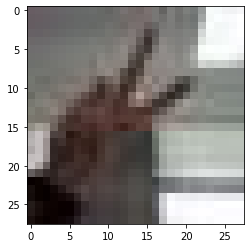

In [1012]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**데이터 전처리 하기**

In [1013]:
x_train.shape

(779, 28, 28, 3)

In [1014]:
x_train = x_train.reshape([-1, 28, 28, 3])

**딥러닝 네트워크 설계하기**

In [1051]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',padding = 'same', input_shape=(28,28,3)))  # padding = 'same'을 넣어주니 정확도 향상됨
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.02))  # dropout을 넣어주니 정확도 향상됨
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_158"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_316 (Conv2D)         (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_449 (MaxPooli  (None, 14, 14, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_317 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_450 (MaxPooli  (None, 7, 7, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_158 (Flatten)       (None, 3136)              0         
                                                                 
 dropout_133 (Dropout)       (None, 3136)           

**딥러닝 네트워크 학습시키기**

In [1052]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 2s 44ms/step - loss: 16.1490 - accuracy: 0.4056
Epoch 2/30
25/25 [==============================] - 1s 44ms/step - loss: 0.9519 - accuracy: 0.5199
Epoch 3/30
25/25 [==============================] - 1s 46ms/step - loss: 0.6087 - accuracy: 0.7664
Epoch 4/30
25/25 [==============================] - 1s 45ms/step - loss: 0.4530 - accuracy: 0.8177
Epoch 5/30
25/25 [==============================] - 1s 45ms/step - loss: 0.3557 - accuracy: 0.8755
Epoch 6/30
25/25 [==============================] - 1s 46ms/step - loss: 0.2856 - accuracy: 0.8793
Epoch 7/30
25/25 [==============================] - 1s 45ms/step - loss: 0.2460 - accuracy: 0.8960
Epoch 8/30
25/25 [==============================] - 1s 44ms/step - loss: 0.1784 - accuracy: 0.9358
Epoch 9/30
25/25 [==============================] - 1s 45ms/step - loss: 0.2138 - accuracy: 0.9127
Epoch 10/30
25/25 [==============================] - 1s 44ms/step - loss: 0.1566 - accuracy: 0.9538
Epoch 11

In [1053]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), "images to be resized.")
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
    
    print(len(images),"images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100 images to be resized.
100 images resized.
가위 이미지 resize 완료!
220 images to be resized.
220 images resized.
바위 이미지 resize 완료!
100 images to be resized.
100 images resized.
보 이미지 resize 완료!


In [1054]:
import numpy as np

def load_data2(img_path, number_of_data=662):  #가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담은 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data, dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0  # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1  # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2  # 보 : 2
        idx=idx+1
    
    print("데이터의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test'
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm=x_test/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 420 입니다.
x_test shape: (662, 28, 28, 3)
y_test shape: (662,)


In [1055]:
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test'
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm=x_test/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 420 입니다.
x_test shape: (662, 28, 28, 3)
y_test shape: (662,)


In [1056]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

21/21 - 0s - loss: 4.5643 - accuracy: 0.6722 - 449ms/epoch - 21ms/step
test_loss: 4.564318656921387
test_accuracy: 0.6722054481506348


**✍ 회고**

* 웹캠을 이용해서 직접 촬영하는 상황이 웃기면서도 재밌었다.   스스로 촬영한 사진을 이용하여 프로젝트 를 진행하여 신선했고, 다른 프로젝트에 비해 조금 재밌었다. 늦게 exploration을 시작해서 여러명과 데이터를 나누지 못한 점이 아쉬웠다.

* 돌리면 돌릴수록 정확도가 떨어지는 느낌이다. padding = same을 넣었다가 빼주고, dropout도 넣었다가 빼주는 등 여러 시도를 해보였으나 큰 성과는 없었다. 이후 아이펠에서 제공하는 test 파일도 추가해보았으나 효과는 미미했다. 가장 높은 정확도는 55.27로 최대였다... 운에 맡기면서 시도하니까 더욱 끝이 안보였다. 더 많은 시도를 했었지만 기록하는 것도 점점 귀찮아졌다. 마감일에 하고 있으니 마음이 급해졌다. 이번주 exploration은 이번주까지 무조건 제출하고 싶다.

* 위와 같이 진행했는데 끝까지 했더니 갑자기 67.22을 기록하였다. 더 많은 시도를 했지만 기록은 안했다. 

* x_train_norm shape와 x_train_reshaped shape 사이 간의 채널 수가 맞지 않아서 자꾸 에러가 떴다. 그래서 x_train_reshaped=x_train_norm.reshape(-1,28,28,3) 부분에서 보이는 것과 같이 3으로 변경해주었더니 에러가 해결되었다.

* 이번 프로젝트까지 하면서 대략적으로 딥러닝 설계의 전개가 잡힌다. 아직 부족한 점들이 많지만, 전체적인 큰 틀에서 딥러닝을 이해하고자 할 것이다...

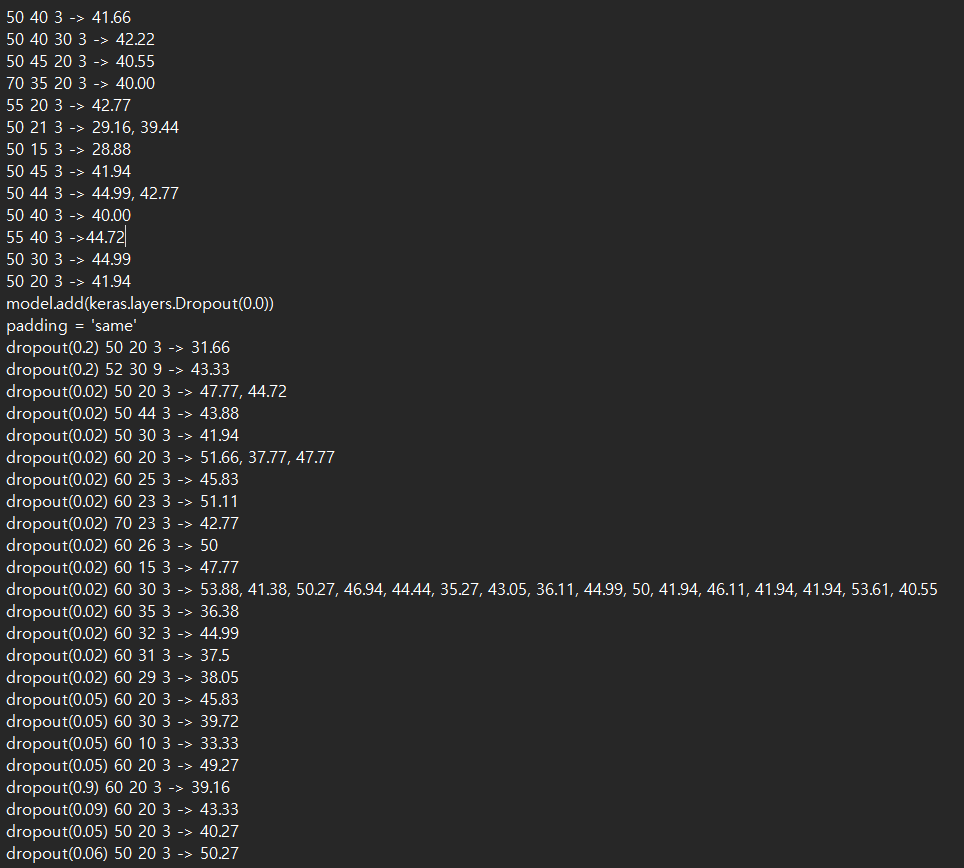

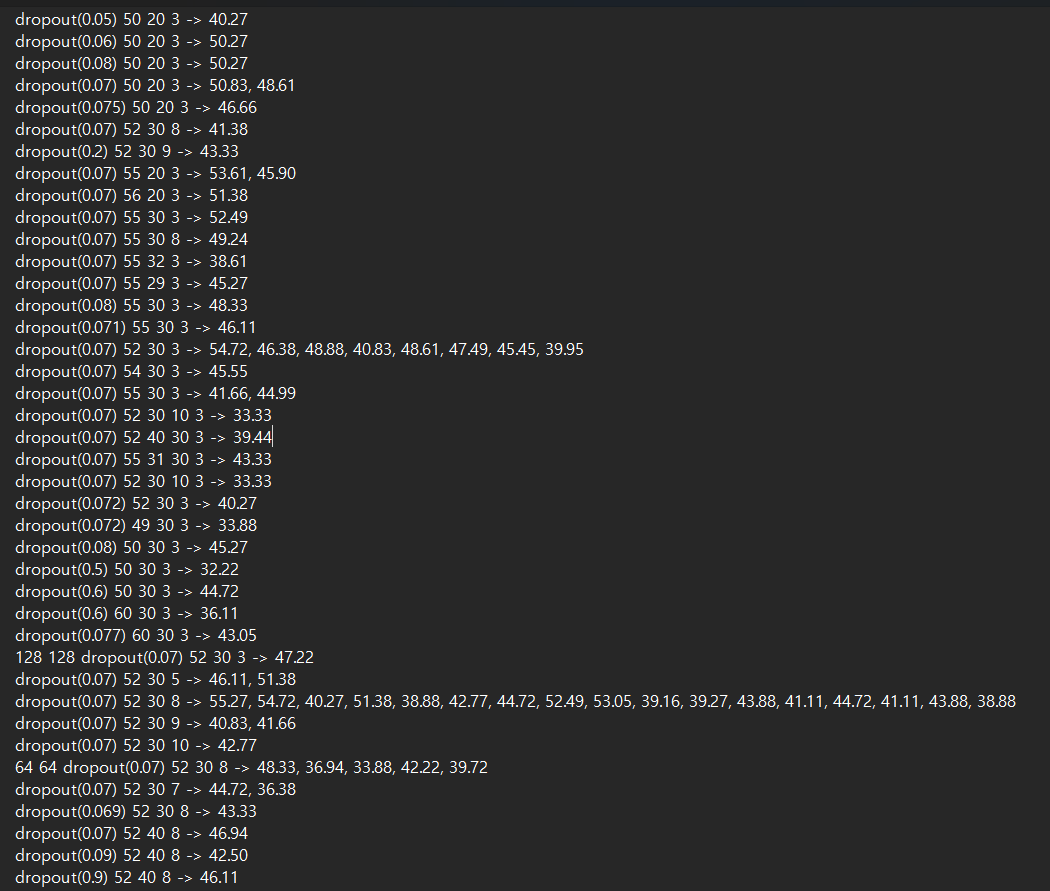

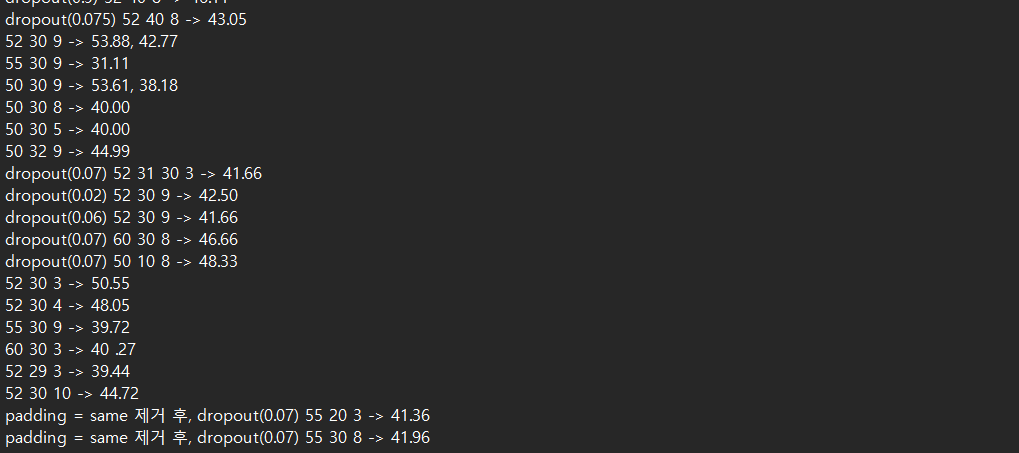